In [1]:
# 箱型图

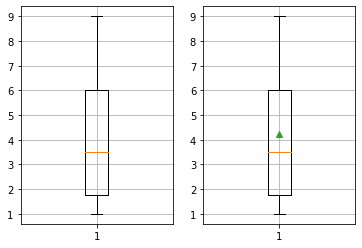

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)
data = [1, 5, 9, 2]
ax[0].boxplot([data])
ax[0].grid(True)
ax[1].boxplot([data], showmeans=True)
ax[1].grid(True)


In [4]:
## 完整参数
# plt.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, sho wmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_xticks=True, autorange=False, zorder=None, *, data=None)

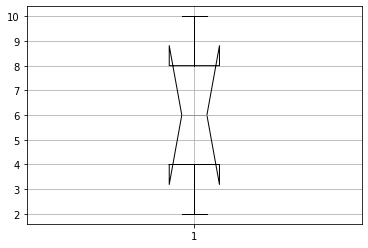

In [6]:
plt.boxplot([2,4,6,8,10], notch=True)
plt.grid(1)

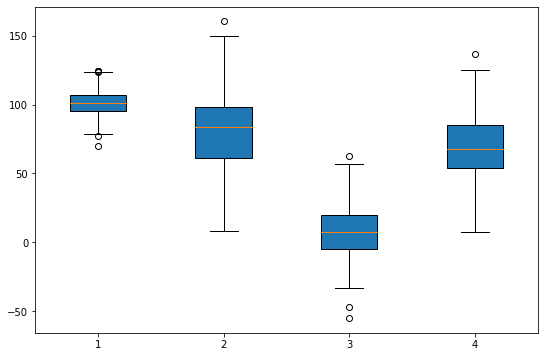

In [13]:
## 具体案例
import numpy as np

# 生成数据集
np.random.seed(10)
collectn_1 = np.random.normal(100, 10, 200)
collectn_2 = np.random.normal(80, 30, 200)
collectn_3 = np.random.normal(9, 20, 200)
collectn_4 = np.random.normal(70, 25, 200)

data = [collectn_1, collectn_2, collectn_3, collectn_4]

# 绘制图形
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, patch_artist=True)

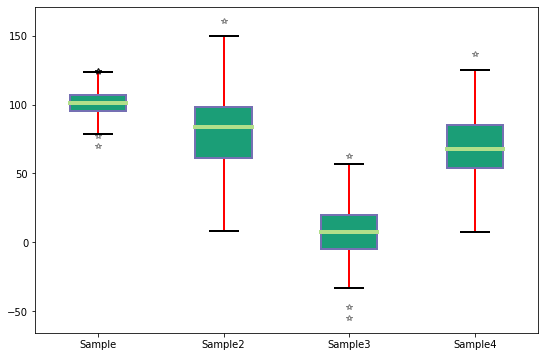

In [15]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

bp = ax.boxplot(data, patch_artist=True)

# 修改矩形框内的填充色和矩形框的变现
for box in bp['boxes']:
    box.set(color='#7570b3', linewidth=2) # 矩形框变现颜色和粗细
    box.set(facecolor = '#1b9e77') # 填充色

# 虚线的粗细和颜色
for whisker in bp['whiskers']:
    whisker.set(color='r', linewidth=2)

# 表示上下限的线的颜色和明细
for cap in bp['caps']:
    cap.set(color='black', linewidth=2)

# 表示中位数的线的颜色和粗细
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=4)

# 表示离群值的符号设置
for flier in bp['fliers']:
    flier.set(marker='*', color='#e7298a', alpha=.5)

# 设置坐标轴
ax.set_xticklabels(['Sample', 'Sample2', 'Sample3', 'Sample4'])
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

In [22]:
## DataFrame 方法
import pandas as pd
import numpy as np
data = np.random.randn(25, 4)
df = pd.DataFrame(data, columns=list('ABCD'))
df.head(2)

,A,B,C,D
0,-1.480410,2.165262,-1.123913,-1.945516
1,-0.123011,-0.475645,0.792190,1.049230


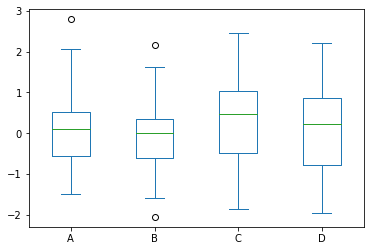

In [23]:
ax = df.plot.box()

In [24]:
# 饼图

In [25]:
## 完整参数
# plt.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None,  textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)

[None, Text(0.5, 1.0, 'Pie')]

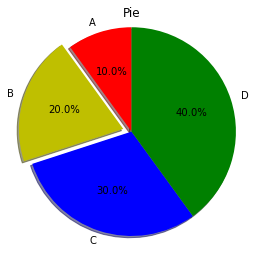

In [38]:
x = [2, 4, 6, 8]
fig, ax = plt.subplots()
labels = ['A', 'B', 'C', 'D']
colors = ['r', 'y', 'b', 'g']
explode=(0, .1, 0, 0)
fig.set_facecolor('white')
ax.pie(x, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, radius=1.2)
ax.set(aspect='equal', title='Pie')

In [44]:
## 某东数据实例
df = pd.read_csv('~/data/cbcpv/bra/colors.csv')
colors = pd.DataFrame({'productColor':df.values[0:, 1], 'color':df.values[0:,2]})
colors.sample(5)

,productColor,color
68,浅紫色,紫色
62,PNK,粉色
25,杏肤色,肤色
14,NaN,NaN
2,071蓝色,蓝色


In [41]:
df2 = pd.read_csv('~/data/cbcpv/bra/bra.csv')
df2.sample(5)

,creationTime,productColor,productSize
6245,2017-07-28 09:09:01,肤色,80B/36B
7697,2017-10-29 11:48:46,黑色,80B
2366,2017-10-04 07:14:07,藕荷色,80C/36C
11632,2017-08-22 22:28:33,粉色,85B=38AB
2082,2017-06-04 20:16:56,酒红色,B80


<BarContainer object of 10 artists>

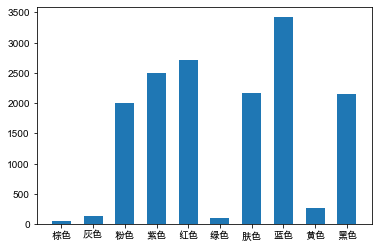

In [46]:
# 柱状图比较不同“Color”特征值的记录数量
cbras = pd.merge(df2, colors, on='productColor', how='left')
color_count = cbras.groupby('color').count()
datas = color_count['productColor']
labels = datas.index
position = range(len(datas.index))


plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.bar(x=position, height=datas.values, width=.6, tick_label=labels)

In [47]:
## 清洗数据

In [49]:
# 对df2种的productSize特征的数值进行清洗
bras2 = df2['productSize'].str.upper()
cup = bras2.str.findall("[a-zA-Z]+").str[0] # 正则表达式进行初步清洗
cup2 = cup.str.replace('M', 'B') # 将其他型号归类为A-E
cup3 = cup2.str.replace('L', 'C')
cup4 = cup3.str.replace('XC', 'D')
cup5 = cup4.str.replace('AB', 'B')
df2['cup'] = cup5
df2.sample(5)

,creationTime,productColor,productSize,cup
4119,2017-02-26 14:11:55,香妃红,80B/36B,B
11898,2017-11-10 13:08:12,磁石款 黑色【薄】,75B/34B,B
4273,2016-11-07 18:22:10,香妃红,80B/36B,B
10590,2017-10-25 20:42:46,肤色,34/75D=L码,D
10161,2017-03-09 00:28:10,肤色,75C/34C,C


[None]

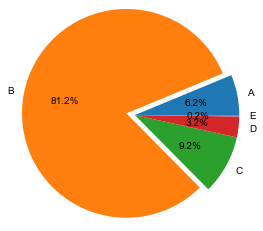

In [52]:
# 数据清洗完毕,进行分组统计,并用饼图表现结果
cup_count = df2.groupby('cup').count()
labels = ['A', 'B', 'C', 'D', 'E']
fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
fig.set_facecolor('#fff')

explode=(0, .1, 0, 0, 0)
ax.pie(cup_count['productColor'], explode=explode, labels=labels, autopct='%1.1f%%', radius=1.2, startangle=0)
ax.set(aspect='equal')

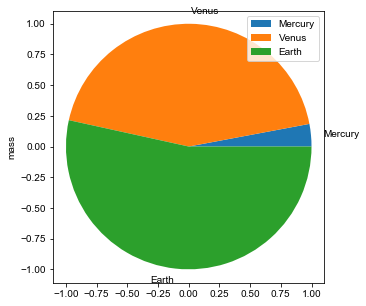

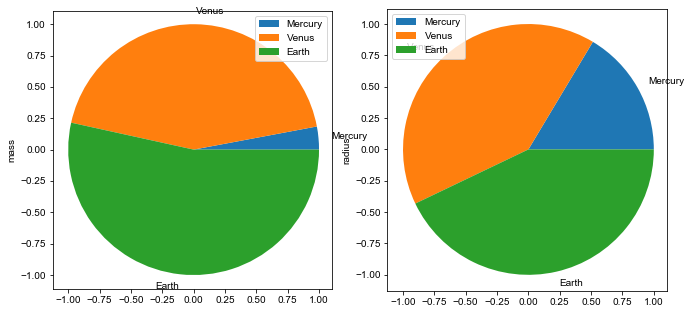

In [63]:
## DataFrame实现
from pandas import DataFrame
df = pd.DataFrame({'mass':[0.330, 4.87, 5.97], 'radius':[2439.7, 6051.8, 6378.1]}, index=['Mercury', 'Venus', 'Earth'])
plot = df.plot.pie(y='mass', figsize=(5,5), frame=True)
plot = df.plot.pie(figsize=(11,6), subplots=True, frame=True)

Text(0.5, 1.0, '频数/频率分布直方图')

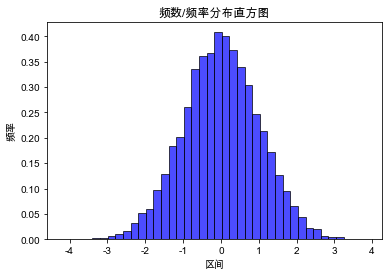

In [64]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# 生成了服从正态分布的一些数据
data = np.random.randn(10000)
plt.hist(data, bins=40, density=True, facecolor='b', edgecolor='black', alpha=.7)
plt.xlabel('区间')
plt.ylabel('频率')
plt.title('频数/频率分布直方图')

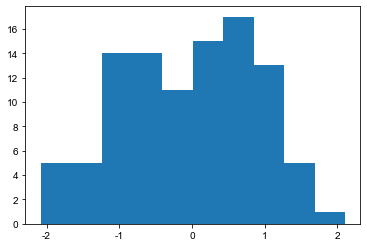

In [65]:
x = np.random.normal(size=100)
n, bins, patches = plt.hist(x)

In [66]:
n

array([ 5.,  5., 14., 14., 11., 15., 17., 13.,  5.,  1.])

In [67]:
bins

array([-2.08239222, -1.6635099 , -1.24462758, -0.82574526, -0.40686294,
        0.01201938,  0.4309017 ,  0.84978402,  1.26866634,  1.68754866,
        2.10643098])

In [68]:
patches

<BarContainer object of 10 artists>

[None]

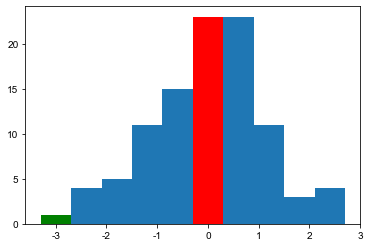

In [79]:
x = np.random.normal(size=100)
n, bins, patches = plt.hist(x)
# 设置第一个矩形
plt.setp(patches[0], 'facecolor', 'g')
# 获取频数最高的矩形
max_index = np.where(n==np.max(n))[0][0]
# 频数最高的矩形设置颜色
plt.setp(patches[max_index], facecolor='r')

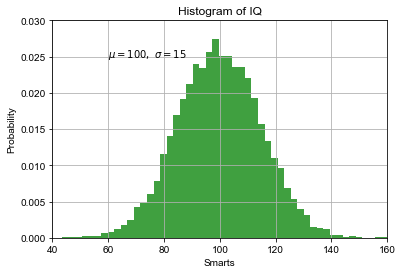

In [84]:
## 智商的高斯分布
np.random.seed(19680801)


mu, sigma = 100, 15 # 分别表示平均数和标准差
x = mu + sigma * np.random.randn(10000)

# 绘制直方图,并得到返回值
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=.75)

# 设置坐标系
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

(0.0, 80.0)

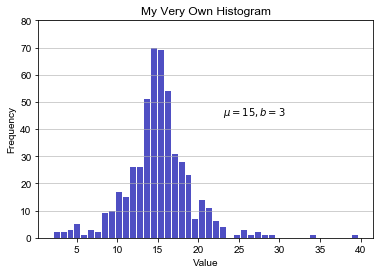

In [85]:
# 反映拉普拉斯分布
np.random.seed(444)
d = np.random.laplace(loc=15, scale=3, size=500)
n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa', alpha=.7, rwidth=.85)

plt.grid(axis='y', alpha=.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq=n.max()
plt.ylim(top=np.ceil(maxfreq/10)*10 if maxfreq % 10 else maxfreq + 10)

In [86]:
# Matplotlib KDE可视化
means = 10, 20
stdevs = 4, 2
dist = pd.DataFrame(np.random.normal(loc=means, scale=stdevs, size=(1000, 2)), columns=['a','b'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

,a,b
min,-2.93,14.40
max,22.58,27.08
mean,9.58,19.93
std,4.18,1.92


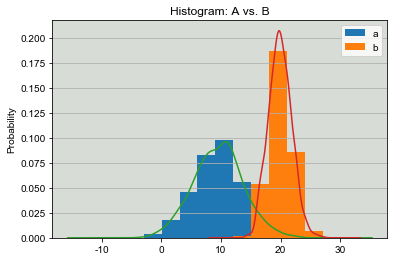

In [87]:
# 使用 DataFrame 对象中的 DataFrame.plot.kde 实现 KDE,并绘制相应的 PDF 曲线
fig, ax = plt.subplots()
# 绘制直方图
dist.plot.hist(density=True, ax=ax) # 1.
# 实现 KDE,并同时作图
dist.plot.kde(ax=ax, legend=False, title='Histogram: A vs. B') # 2.

ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')